# Sección 3: Gapminder

## 3.1 Introducción a Gapminder

### Caso de estudio: Tendencias en la salud y la economía mundiales

**Hans Rosling** era el cofundador de la Fundación **Gapminder**, una organización dedicada a educar al público mediante datos para disipar mitos comunes sobre el llamado mundo en desarrollo. La organización utiliza datos para mostrar cómo las tendencias actuales en los campos de salud y economía contradicen las narrativas que emanan de la cobertura sensacionalista de los medios de catástrofes, tragedias y otros eventos desafortunados.

Como se indica en el sitio web de la Fundación Gapminder:

> Los periodistas y cabilderos cuentan historias dramáticas. Ese es su trabajo. Cuentan historias sobre eventos extraordinarios y personas inusuales. Las historias dramáticas se acumulan en las mentes de las personas en una visión del mundo demasiado dramática y con fuertes sentimientos de estrés negativo: “¡El mundo está empeorando!”, “¡Somos nosotros contra ellos!”, “¡Las demás personas son extrañas!”, “¡La población sigue creciendo!” y “¡A nadie le importa!”

Esta sección se basa en dos charlas que ejemplifican esta perspectiva educativa: *New Insights on Poverty* y *The Best Stats You’ve Ever Seen*. Específicamente, en esta sección usaremos datos para intentar responder a las siguientes dos preguntas:

1. ¿Es una caracterización justa del mundo actual decir que está dividido en naciones ricas occidentales y el mundo en desarrollo compuesto por África, Asia y América Latina?

1. ¿Ha empeorado la desigualdad de ingresos en todos los países durante los últimos 40 años?

> Para responder a estas preguntas, utilizaremos el set de datos `gapminder` proveído por `dslabs`.

### Gapminder Dataset

Comenzamos examinando nuestros conocimientos sobre las diferencias en la mortalidad infantil en diferentes países, ¿Qué países creen que tuvieron las tasas de mortalidad infantil más altas en 2015?.

Al responder a estas preguntas sin datos, los países no europeos suelen ser elegidos como los que tienen tasas de mortalidad infantil más altas. También es común suponer que los países considerados como parte del mundo en desarrollo  tienen tasas de mortalidad igualmente altas.

Para responder a estas preguntas con datos, podemos usar `dplyr`. Por ejemplo, para la comparación entre Sri Lanka o Turquía vemos que:

In [4]:
# Cargamos y seleccionamos gapminder
library(dplyr)
library(dslabs)
data(gapminder)

# Comparamos la mortalidad infantil de Sri Lanka y Turkey
gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)


Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




country,infant_mortality
<fct>,<dbl>
Sri Lanka,8.4
Turkey,11.6


> Turquía tiene la mayor tasa de mortalidad infantil

Podemos analizar mas países y ver que los países europeos en esta lista tienen tasas de mortalidad infantil más altas: Polonia tiene una tasa más alta que Corea del Sur y Rusia tiene una tasa más alta que Malasia. También vemos que Pakistán tiene una tasa mucho más alta que Vietnam y Sudáfrica tiene una tasa mucho más alta que Tailandia. 

Resulta que cuando Hans Rosling le dio este cuestionario a grupos de personas educadas, la puntuación promedio fue menos de 2.5 de 5, peor de lo que hubieran obtenido si hubieran adivinado. Esto implica que más que ignorantes, estamos mal informados.

### Esperanza de vida y tasas de fertilidad

Para analizar esta visión del mundo, nuestro primer gráfico es un diagrama de dispersión de la esperanza de vida versus las tasas de fertilidad (número promedio de hijos por mujer).

Comenzamos mirando los datos de hace unos 50 años.

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


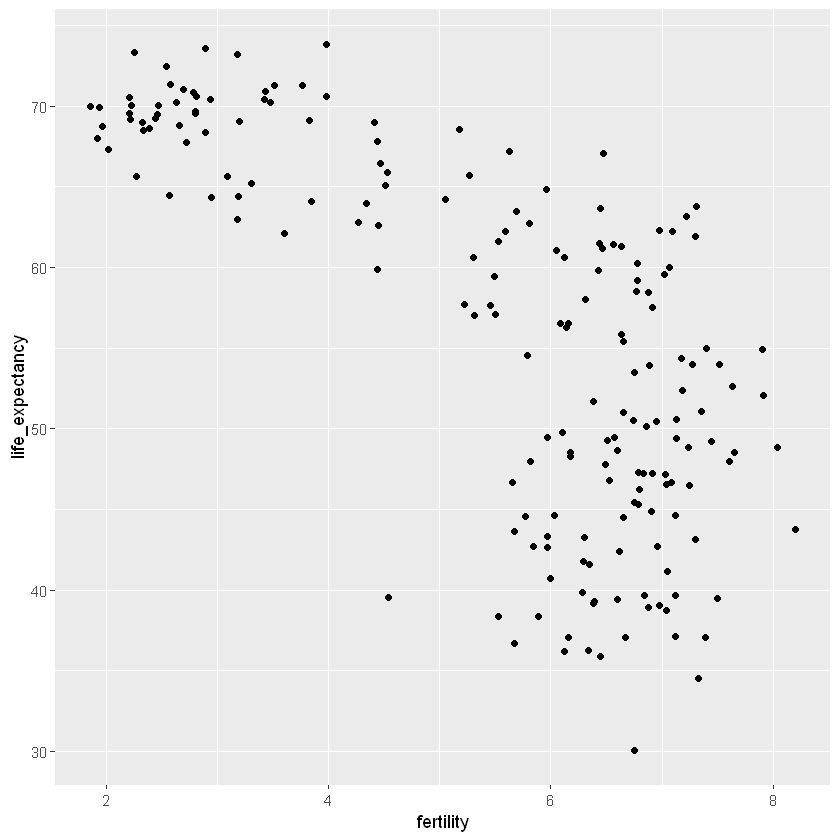

In [5]:
library(ggplot2)
library(dplyr)
library(dslabs)
data(gapminder)

filter(gapminder, year == 1962) %>% ggplot(aes(fertility, life_expectancy)) +
    geom_point()


La mayoría de puntos se dividen en dos categorías distintas:

1. Esperanza de vida alrededor de 70 años y 3 o menos hijos por familia.
2. Esperanza de vida inferior a 65 años y más de 5 niños por familia.

Para confirmar que estos países son de las regiones que esperamos, podemos usar un color para representar un continente.

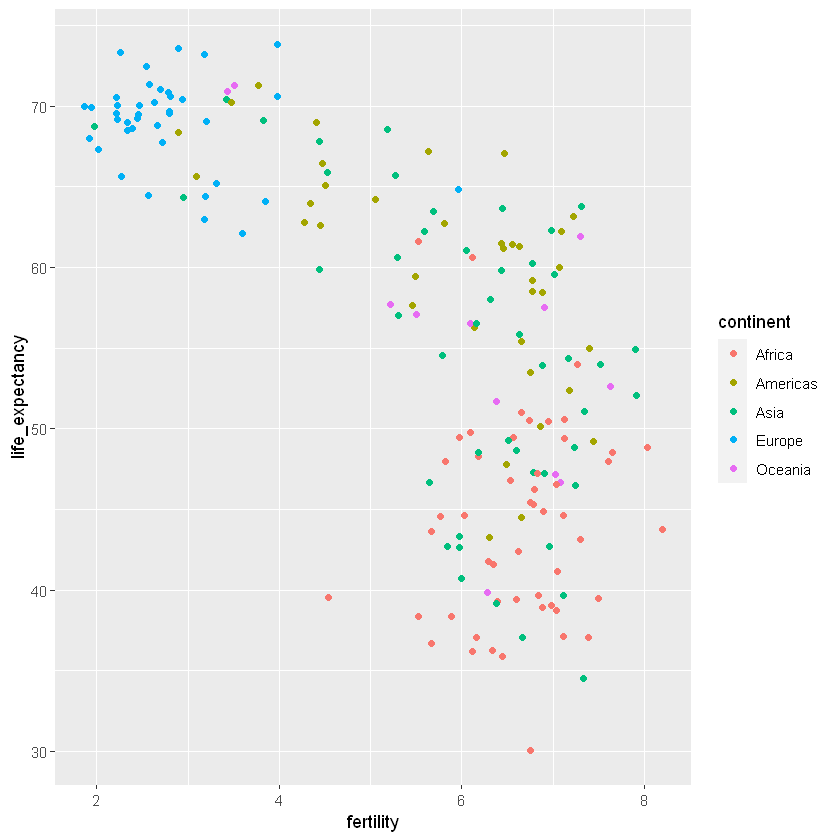

In [6]:
filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point()


## 3.2 Usando el Dataset Gapminder

### Separar por facetas

Podemos gráficar fácilmente los datos de 2012 de la misma manera que lo hicimos para 1962. Sin embargo, para hacer comparaciones, es preferible gráficar lado a lado. En `ggplot2`, logramos esto separando las variables en facetas (faceting en inglés): estratificamos los datos por alguna variable y hacemos el mismo gráfico para cada estrato.
Para separar en facetas, añadimos una capa con la función `facet_grid`

- La función `facet_grid()` permite separar hasta dos variables, con filas separadas por una variable y columnas separadas por la otra variable.

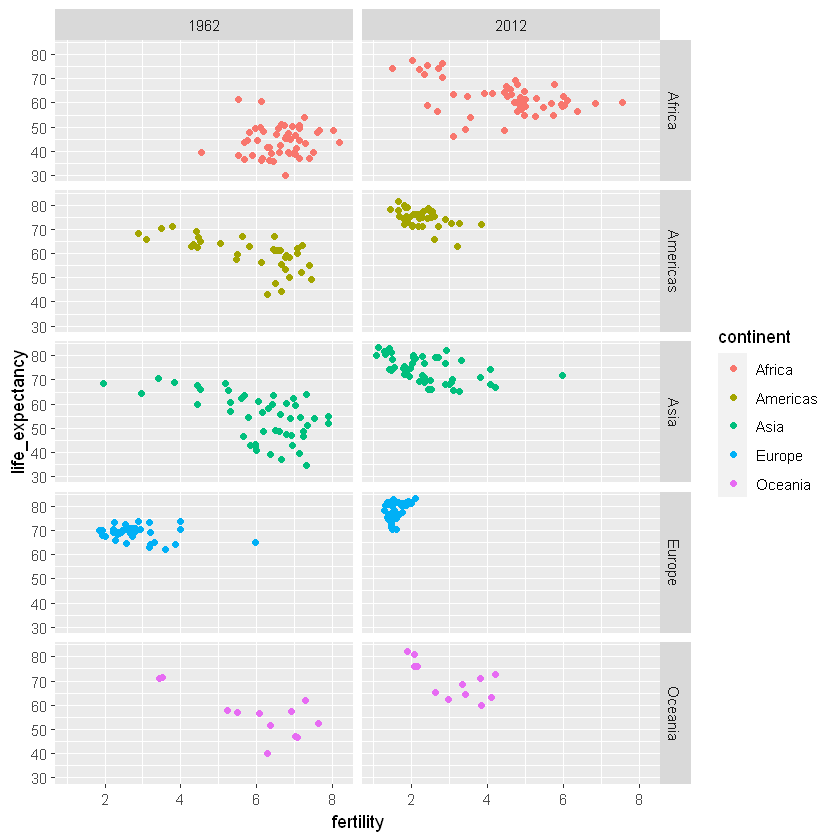

In [7]:
# facet por continente y año

filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(continent ~ year)


- Para facetar por una sola variable, usamos el operador de punto como la otra variable.

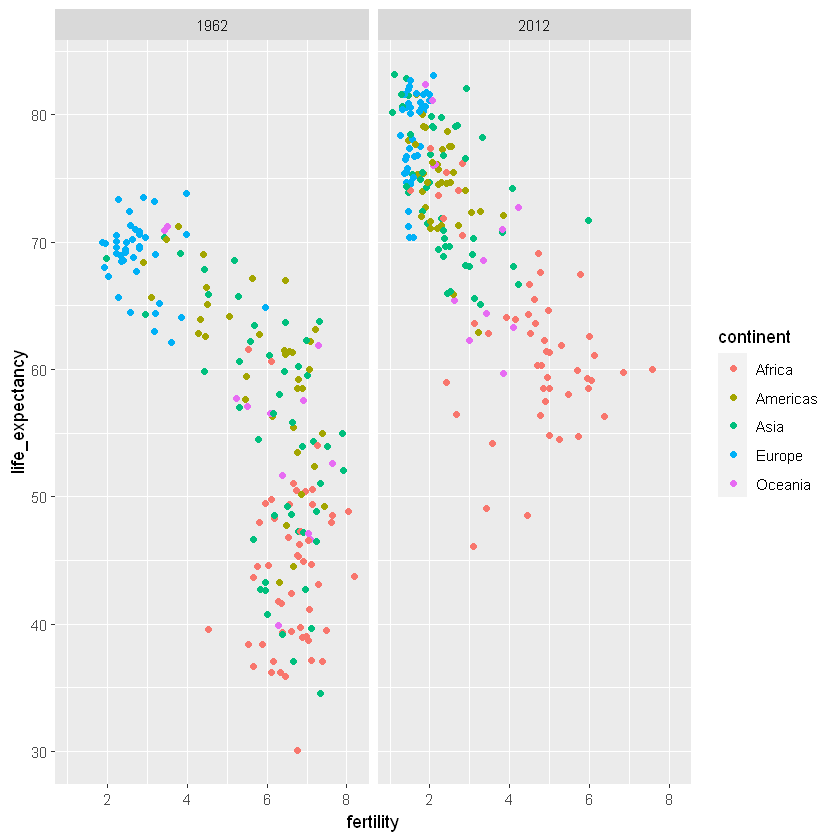

In [8]:
# facet solo por año
filter(gapminder, year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_grid(. ~ year)


- La función `facet_wrap()` faceta por una variable y envuelve automáticamente la serie de gráficos para que tengan dimensiones legibles.

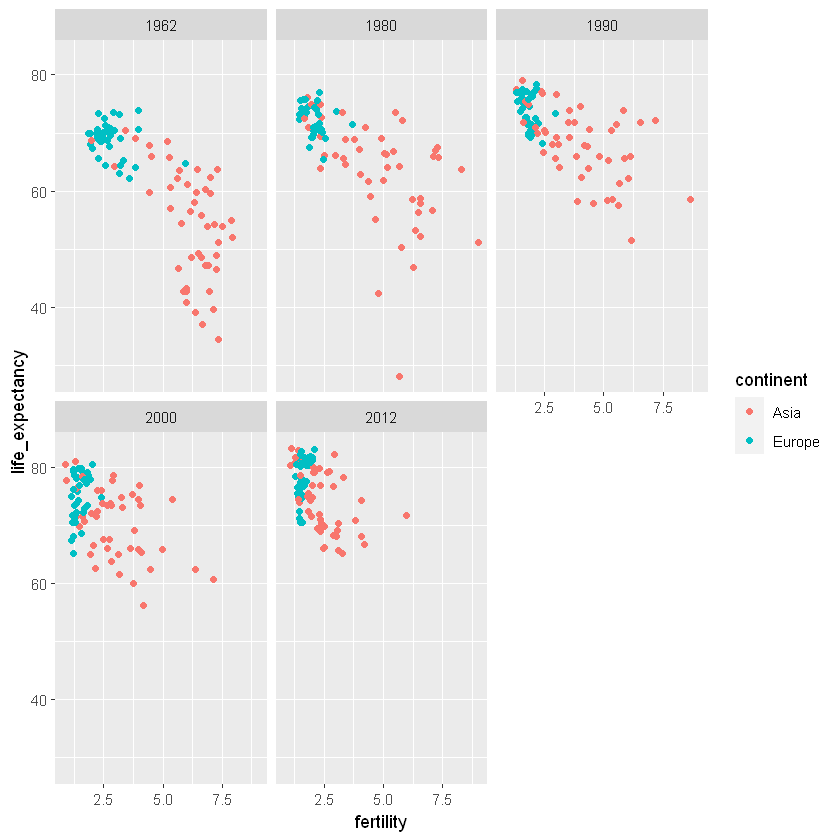

In [9]:
# facet por año, gráficos agrupados en múltiples filas
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>%
    filter(year %in% years & continent %in% continents) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_wrap(~year)


> Este gráfico muestra claramente cómo la mayoría de los países asiáticos han mejorado a un ritmo mucho más rápido que los europeos.

> La creación de facetas mantiene los ejes fijos en todos los gráficos, lo que facilita las comparaciones entre gráficos.

### Gráficos de series de tiempo

Las visualizaciones anteriores ilustran efectivamente que los datos ya no son compatibles con la visión del mundo occidental frente al mundo en desarrollo. Al ver estos gráficos, surgen nuevas preguntas. Por ejemplo, ¿Qué países están mejorando más y cuáles menos? ¿La mejora fue constante durante los últimos 50 años o se aceleró más durante ciertos períodos? 

Para una mirada más detenida que pueda ayudar a responder a estas preguntas, presentamos gráficos de series de tiempo (time series plots en inglés).

Los gráficos de series de tiempo tienen tiempo en el eje-x y un resultado o medida de interés en el eje-y. Por ejemplo, aquí vemos un gráfico de la tendencia de las tasas de fertilidad de Estados Unidos:

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


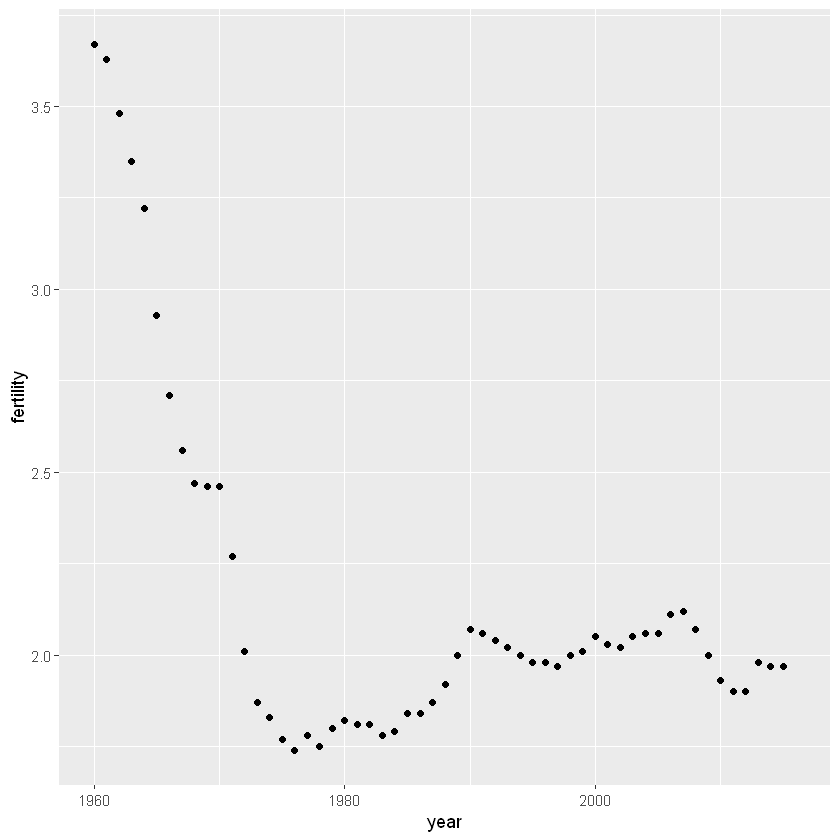

In [10]:
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_point()


Cuando los puntos están regular y densamente espaciados, como vemos arriba, creamos una curva que une los puntos con líneas, para transmitir que estos datos provienen de una sola serie, aquí un país. 

Para hacer esto, usamos la función `geom_line` en vez de `geom_point`.

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


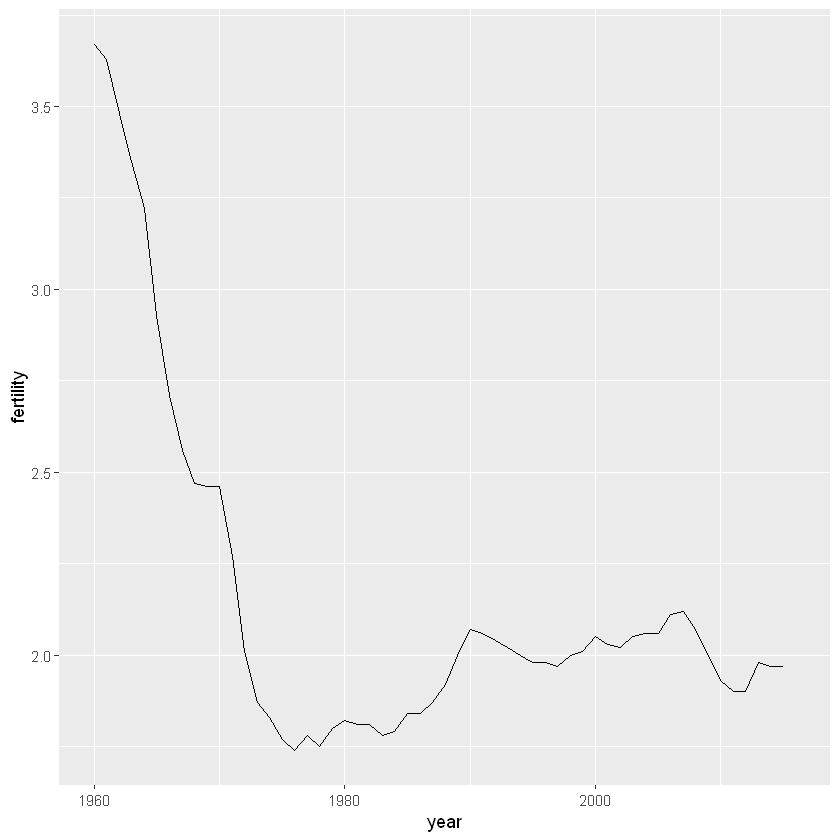

In [11]:
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_line()


Podemos de esta forma trazar varias líneas en el mismo gráfico. Recordando agrupar o colorear por una variable para que las líneas se tracen de forma independiente.

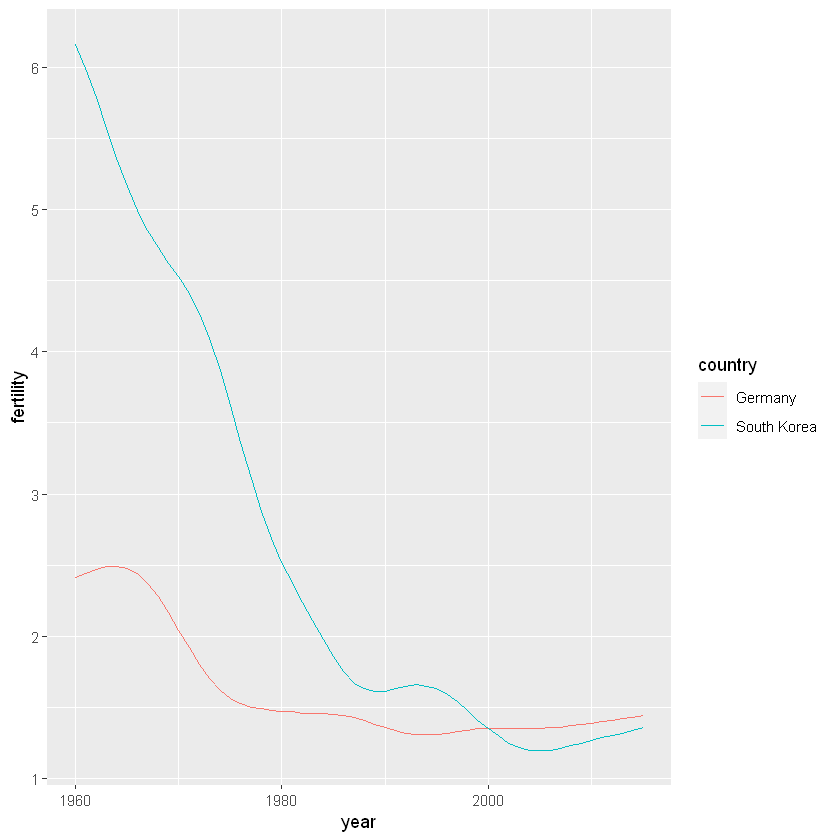

In [12]:
countries <- c("South Korea", "Germany")

gapminder %>%
    filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_line()


Para los gráficos de tendencias, recomendamos etiquetar las líneas en lugar de usar leyendas, ya que el espectador puede ver rápidamente qué línea representa qué país. 

Esta sugerencia aplica a la mayoría de los gráficos: las etiquetas generalmente se prefieren a las leyendas.

Aquí un ejemplo con la esperanza de vida, de como hacerlo.

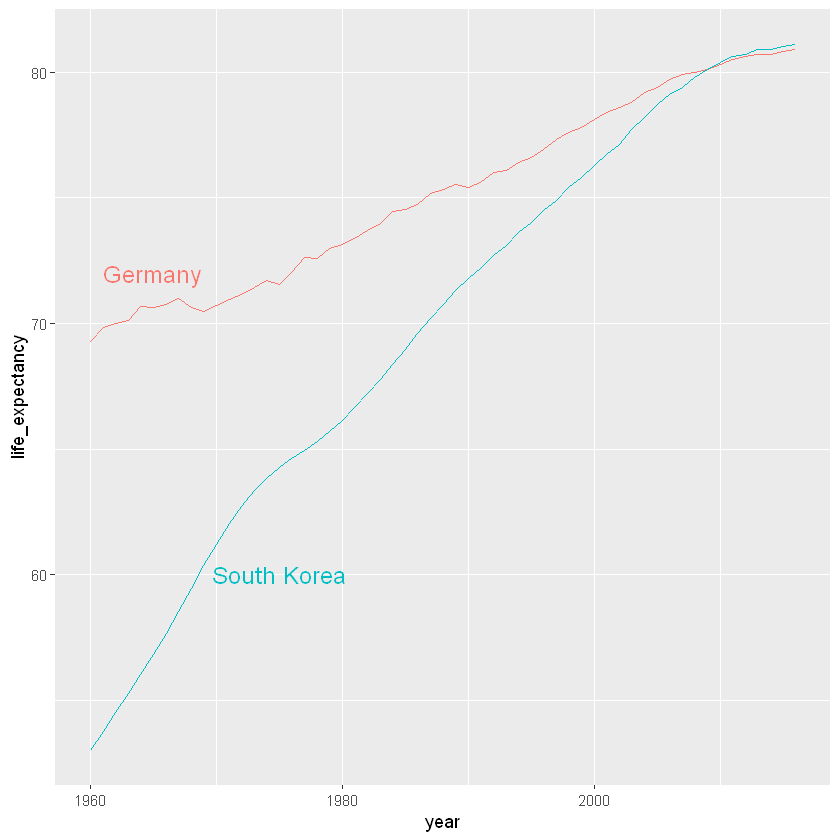

In [13]:
# Definimos una tabla con la ubicación de las etiquetas
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))

# Creamos el gráfico
gapminder %>% filter(country %in% countries) %>% # filtramos los datos por el país
    ggplot(aes(year, life_expectancy, col = country)) + # Asignamos los datos a la gráfica
    geom_line() + # creamos la capa de línea
    geom_text(data = labels, aes(x, y, label = country), size = 5) + # Asignamos las etiquetas a la gráfica
    theme(legend.position = "none") # eliminamos la leyenda


### Transformaciones

Cuando se le pregunta al público en general si los países pobres se han vuelto más pobres y los países ricos se han vuelto más ricos, la mayoría responde que sí. 

Mediante el uso de estratificación, histogramas, densidades suaves y diagramas de caja, podremos ver si este realmente es el caso.

La tabla de datos `gapminder` incluye una columna con el producto interno bruto de los países (GDP por sus siglas en inglés). El GDP mide el valor de mercado de los bienes y servicios producidos por un país en un año.

El GDP por persona a menudo se usa como un resumen aproximado de la riqueza de un país. 

Utilizando los dólares estadounidenses actuales como una unidad, una persona que sobrevive con un ingreso de menos de $2 por día se define como viviendo en la “pobreza absoluta”. Añadimos esta variable a la tabla de datos:

In [14]:
# Agregamos una columna con la media de dólares por dia
# Utilizamos el producto interno para calcular la media de dólares por dia
gapminder <- gapminder %>% mutate(dollars_per_day = gdp / population / 365)


> Estos son promedios de país y dentro de cada país hay mucha variabilidad. Todos los gráficos y las ideas que se describen a continuación se refieren a los promedios de los países y no a los individuos dentro de estos.

Por supuesto, estos son promedios de país y dentro de cada país hay mucha variabilidad. Todos los gráficos y las ideas que se describen a continuación se refieren a los promedios de los países y no a los individuos dentro de estos.

Abajo tenemos un histograma de ingresos diarios desde 1970:

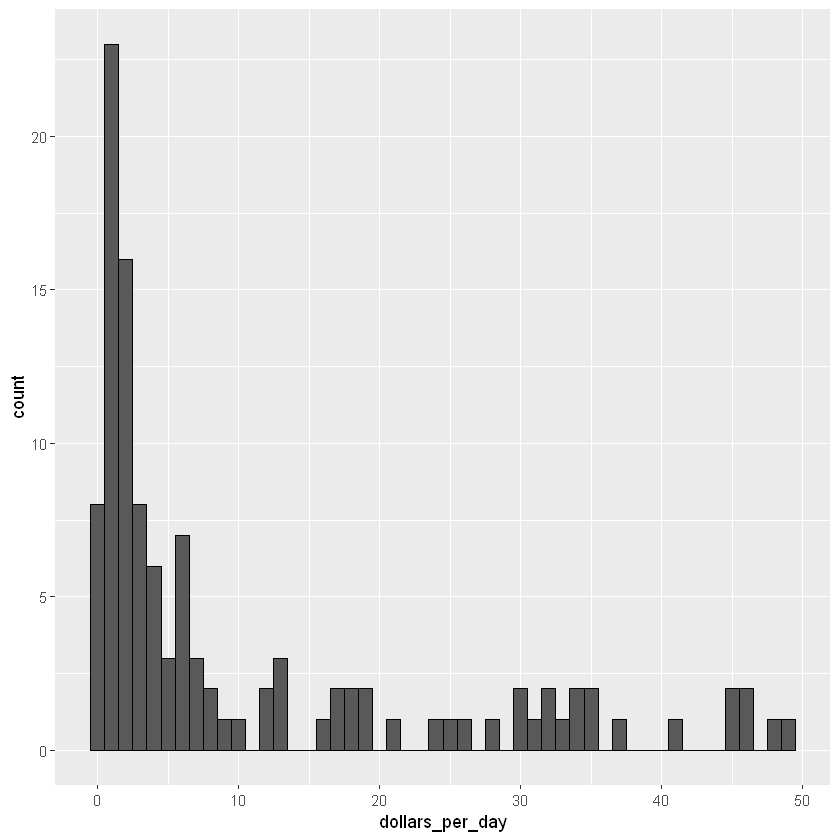

In [15]:
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black")


En este gráfico  la mayoría del eje-x está dedicado a 35 países con promedio
de menos de $10. Por lo tanto, el gráfico no es muy informativo con respecto a países con valores inferiores a $10 por día.

Sería más informativo poder ver rápidamente cuántos países tienen ingresos diarios promedio de aproximadamente $1 (extremadamente pobre), $2 (muy pobre), $4 (pobre), $8 (promedio), $16 (acomodado), $32 (rico), $64 (muy rico) por día.

Estos cambios son multiplicativos y las transformaciones logarítmicas convierten los cambios multiplicativos en aditivos: cuando se usa la base 2, la duplicación de un valor se convierte en un aumento de 1.
Aquí tenemos la distribución si aplicamos una transformación logarítmica base 2:

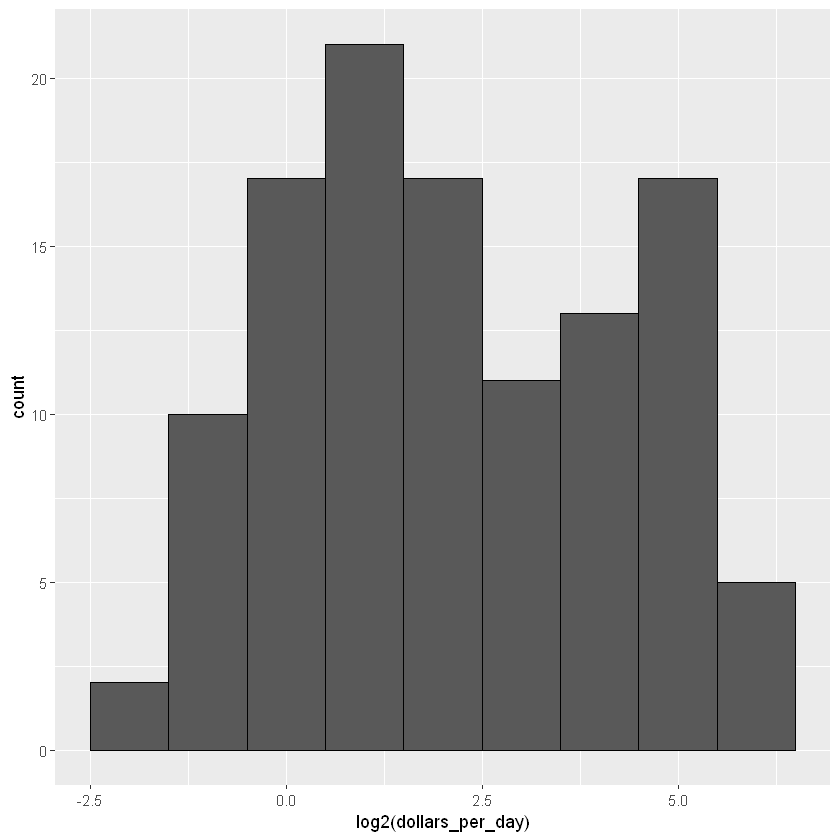

In [16]:
gapminder %>%
filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(log2(dollars_per_day))) +
    geom_histogram(binwidth = 1, color = "black")

Otras opciones comunes son base e (el logaritmo natural) y base 10

> En general no es recomendado utilizar el logaritmo natural para exploración y visualización, dado que $e^n$ es difícil de calcular mentalmente, a diferencia de $2^n \text{ o } 10^n$.
> 

En el ejemplo de dólares por día, utilizamos la base 2 en lugar de la base 10 porque el rango resultante es más fácil de interpretar.

Otra consecuencia de un rango limitado es que elegir el ancho del compartimiento (binwidth en inglés) es más difícil. Con logaritmo base 2, sabemos que un ancho de compartimiento de 1 se convertirá en un compartimiento con rango $x$ a $2x$.

Hay dos formas en que podemos usar las transformaciones logarítmicas en los gráficos.

- Tomar el logaritmo de los valores antes de gráficar.
    - Podemos interpretar más fácilmente los valores intermedios en la escala.
    - La ventaja de usar escalas logarítmicas es que vemos los valores originales en los ejes
- Usar escalas logarítmicas en los ejes
    - la ventaja de mostrar escalas logarítmicas es que los valores originales se muestran en el gráfico y son más fáciles de interpretar.

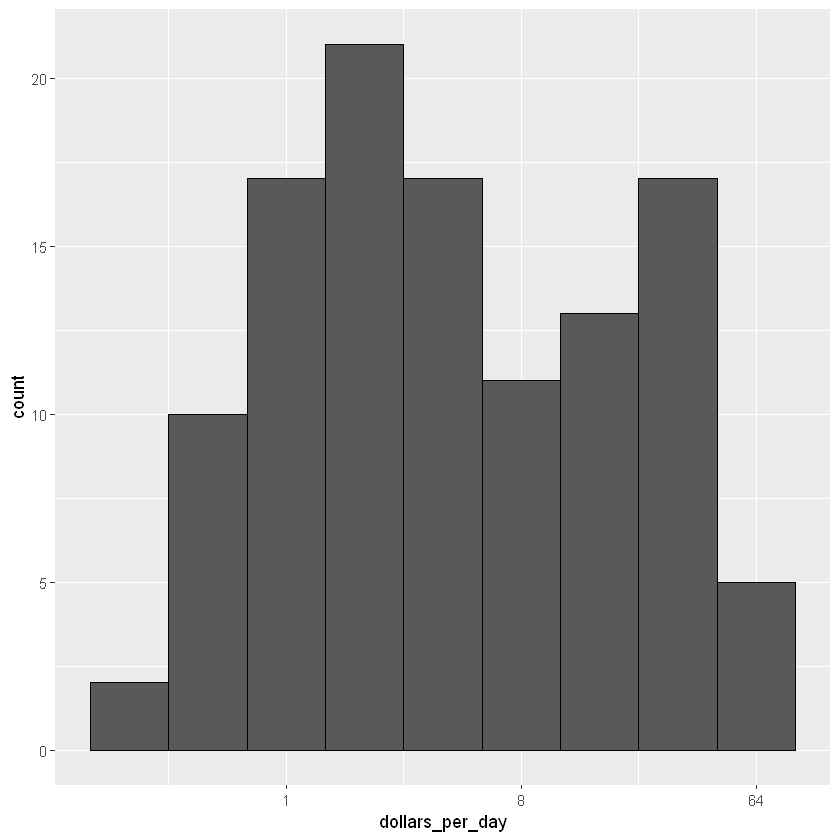

In [17]:
# histograma con escala logarítmica en el eje x
gapminder %>%
filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2")


En el histograma anterior vemos dos protuberancias: una aproximadamente en 4 y otra aproximadamente en 32. En estadística, estas protuberancias a veces se denominan modas (modes en inglés). 

La moda de una distribución es el valor con la frecuencia más alta. 

- La moda de distribución normal es el promedio.
- Cuando una distribución, como la anterior, no disminuye monotónicamente de la moda, llamamos a los lugares donde sube y baja de nuevo modas locales y decimos que la distribución tiene modas múltiples.

El histograma anterior sugiere que la distribución de ingreso de los países en 1970 es bimodal. Esta bimodalidad es consistente con un mundo dicotómico compuesto por países con ingresos promedio inferiores a $8 (3 en la escala log 2) por día y países por encima de eso.

### Estratificar y Boxplots